AmazonAnalyzePersonalSpent

Analyse the Amount spent @Amazon.ca over the last year.*

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 677 entries, 0 to 676
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Order ID           677 non-null    object 
 1   Order Date         677 non-null    object 
 2   Currency           677 non-null    object 
 3   Price              677 non-null    float64
 4   Price Tax          677 non-null    float64
 5   Shipping Charge    677 non-null    float64
 6   Item Subtotal      611 non-null    float64
 7   Product Condition  677 non-null    object 
 8   Quantity           677 non-null    int64  
 9   Order Status       677 non-null    object 
 10  Ship Date          611 non-null    object 
 11  Product Name       677 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 63.6+ KB
Order ID              object
Order Date            object
Currency              object
Price                float64
Price Tax            float64
Shipping Charge

Text(0.5, 0, 'Month')

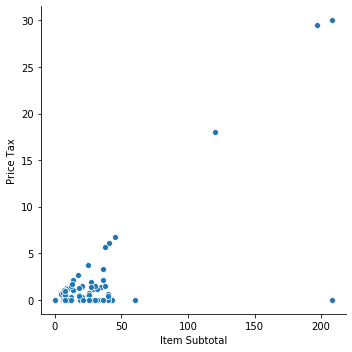

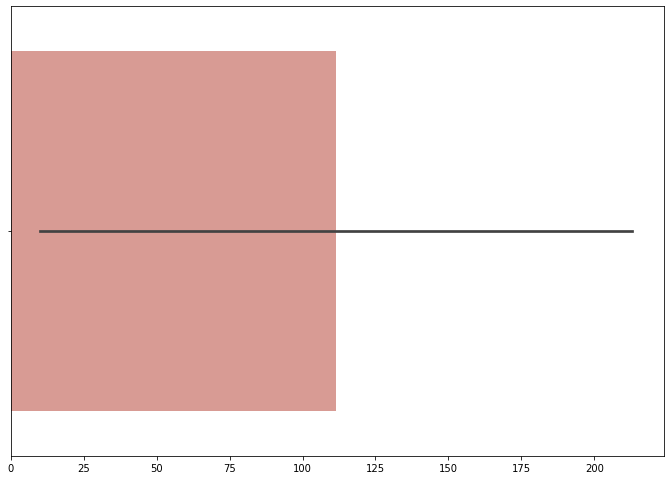

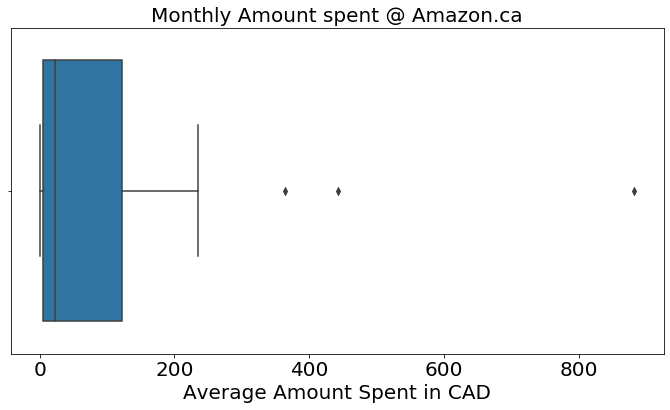

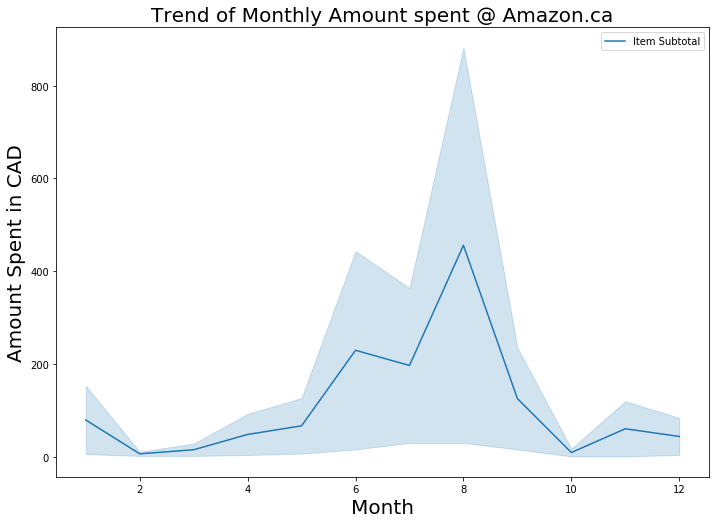

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import os

os.getcwd()

amzn=pd.read_csv("Retail.OrderHistory.csv")
amzn.info()

# using apply method 
amzn[['Price', 'Price Tax','Item Subtotal']] = amzn[['Price', 'Price Tax','Item Subtotal']].apply(pd.to_numeric) 
print(amzn.dtypes)

amzn.head()

#format date
amzn['Order Date']=pd.to_datetime(amzn['Order Date'].str.slice(0,10))

#Get the purchases from last year and transaction in CAD
amzn=amzn[amzn['Order Date']>'2019-09-01'] 
amzn=amzn[amzn['Currency']=='CAD']
amzn=amzn.drop(columns=['Ship Date','Product Condition'])
amzn

#replace nas
amzn['Item Subtotal']=amzn['Item Subtotal'].fillna(0)

ax = sns.relplot(x="Item Subtotal", y="Price Tax",data=amzn)

#Total amount spent in last year
totspent=sum(amzn.loc[amzn['Order Status']=='Closed','Item Subtotal'])
totspent

#spend each month
amzn['Order Month']=pd.DatetimeIndex(amzn['Order Date']).month
monthlyspent=pd.pivot_table(amzn,index=['Order Month'],values=['Item Subtotal'],aggfunc={np.sum,np.size})
monthlyspent

x=np.mean(monthlyspent['Item Subtotal'])
x

#Average number of orders and amount 
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.barplot(x,color="salmon", saturation=.5)

fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7,6)
ax = sns.boxplot(x=monthlyspent['Item Subtotal'])
ax.axes.set_title("Monthly Amount spent @ Amazon.ca",fontsize=20)
ax.set_xlabel("Average Amount Spent in CAD",fontsize=20)
ax.tick_params(labelsize=20)

#Line chart
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
ax=sns.lineplot(data=monthlyspent)
ax.axes.set_title("Trend of Monthly Amount spent @ Amazon.ca",fontsize=20)
ax.set_ylabel("Amount Spent in CAD",fontsize=20)
ax.set_xlabel("Month",fontsize=20)


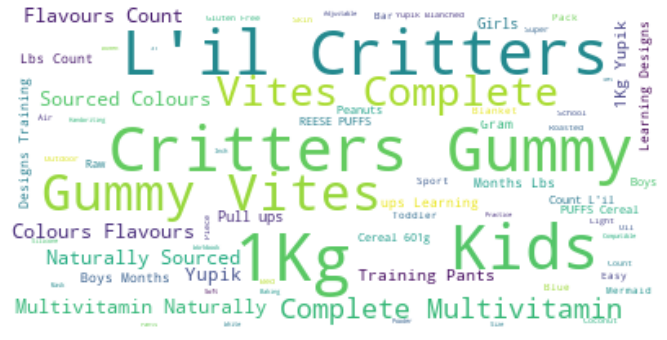

In [17]:
from wordcloud import WordCloud, STOPWORDS
text = ' '.join(list(amzn['Product Name']))
text
# Create and generate a word cloud image:
stopwords = set(STOPWORDS)
stopwords.update(["colours", "complete", "sourced", "flavor", "flavors"])
wordcloud = WordCloud(max_font_size=40, max_words=70, background_color="white").generate(text)

# Display the generated image:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()